In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('automobileEDA.csv')
df.head()
# check 5 rows of the data frame

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
# Create linear regression object
lm = LinearRegression()
lm 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Let figure out how Highway-mpg can help us predict the car price
# We'll use simple linear regression to create a linear function with 'highway-mpg'
# as the predictor variable and the price as the response variable

In [6]:
X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
print('Highway-mpg',X)
print('Price',Y)

Highway-mpg      highway-mpg
0             27
1             27
2             26
3             30
4             22
5             25
6             25
7             25
8             20
9             29
10            29
11            28
12            28
13            25
14            22
15            22
16            20
17            53
18            43
19            43
20            41
21            38
22            30
23            38
24            38
25            38
26            30
27            30
28            24
29            54
..           ...
171           32
172           32
173           32
174           24
175           24
176           24
177           24
178           46
179           34
180           46
181           34
182           34
183           42
184           32
185           29
186           29
187           24
188           38
189           31
190           28
191           28
192           28
193           28
194           22
195           22
196           28
19

In [8]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#We can output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [10]:
#Intercept(a)
lm.intercept_

array([38423.30585816])

In [11]:
lm.coef_

array([[-821.73337832]])

In [12]:
#Regression line model for the price:
#price = 38423.30 - 821.733 x highway-mpg

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [14]:
lm1 = LinearRegression()

In [15]:
# Now let's apply the same steps to engine-size
X1 = df[['engine-size']]
Y1 = df[['price']]

In [16]:
lm1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
Y1_hat = lm1.predict(X1)
Y1_hat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [18]:
lm.intercept_

array([38423.30585816])

In [19]:
lm.coef_

array([[-821.73337832]])

In [20]:
# Regression line for engine-size as a predictor variable
#price = -7963.33 + 166.86 engine-size

In [21]:
df[['price','engine-size']].corr()
# price & engine-size are positively correlate. Hence,
# the slope should be positive

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


In [22]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [23]:
lm2 = LinearRegression()

In [24]:
lm2.fit(z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm2.intercept_

-15806.624626329238

In [26]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [27]:
import seaborn as sns
%matplotlib inline

(0, 48280.034330033835)

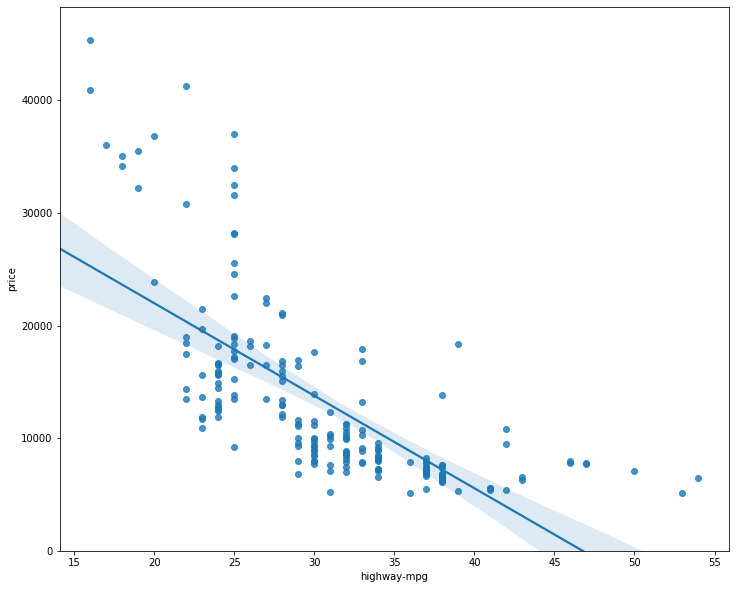

In [28]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0, 47422.919330307624)

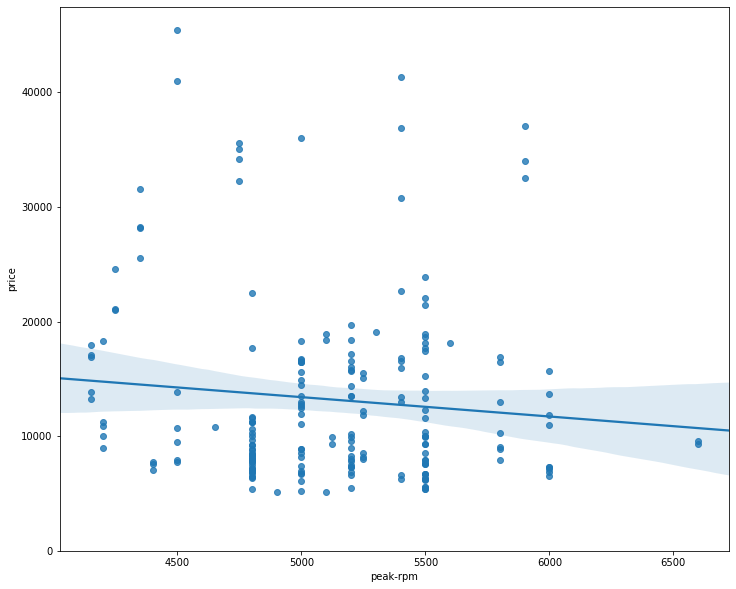

In [29]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [30]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


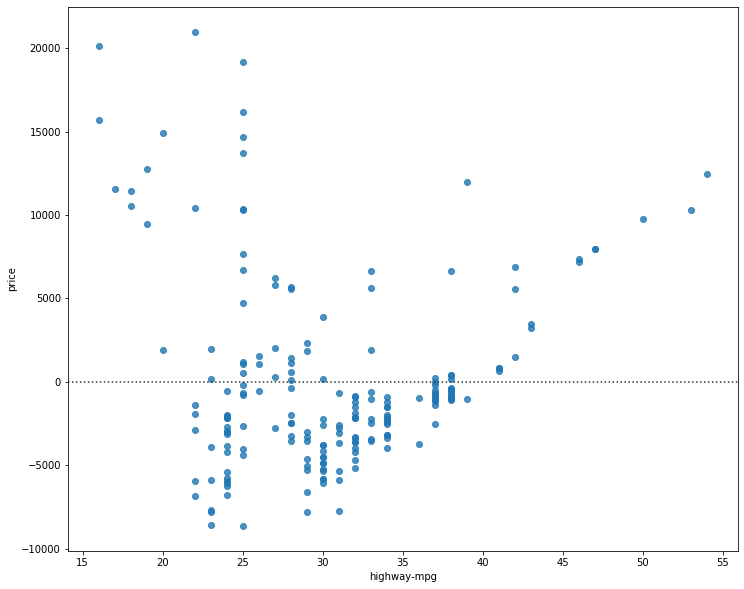

In [31]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'], df['price'])

In [32]:
Y_hat = lm2.predict(z)

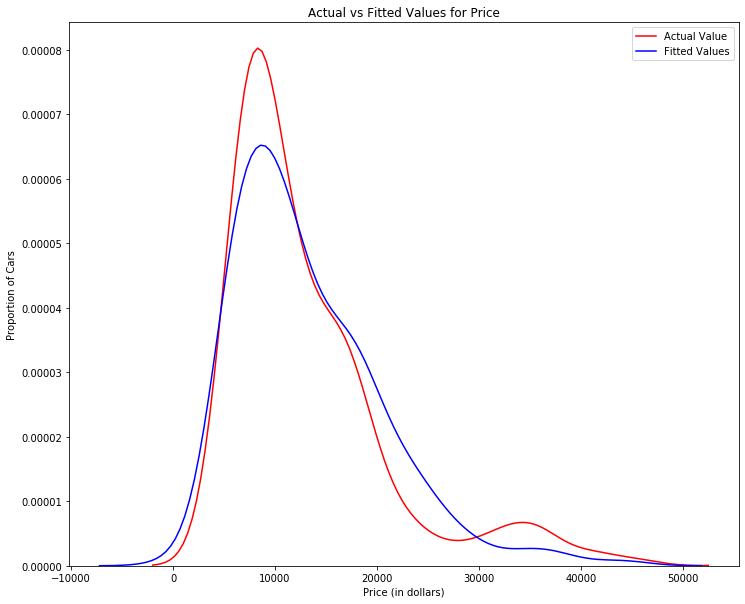

In [33]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [34]:
#We can see that fitted values are reasonable close to actual values
#as two distributions overlap a bit
#However, definitedly there a some rooms for imporvement

In [36]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new)
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    

In [46]:
x = df['highway-mpg']
y = df['price']
z = df['length']
# Let's fit the polinomial using the function polyfit, then use the function poly1d
# to display the polinomial function

In [39]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


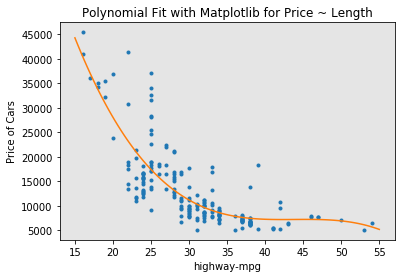

In [40]:
#let's plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [41]:
np.polyfit(x,y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [49]:
# Create 11 order polinomial model
f_11 = np.polyfit(x,z, 11)
p_11 = np.poly1d(f)
print(p_11)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


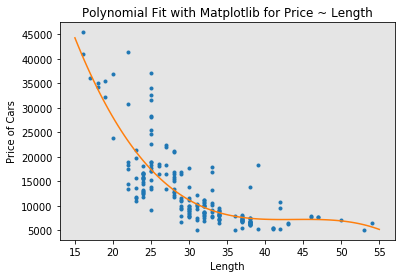

In [45]:
PlotPolly(p_11, x, y, 'Length')

In [60]:
lm4 = LinearRegression()
Xh = df[['horsepower']]
Y = df[['price']]

In [61]:
lm4.fit(Xh,Y)
#Find the R-square
print('The R-square is: ', lm4.score(Xh,Y))

The R-square is:  0.6554109795391572


In [ ]:
#We can say that 65.5% of the variation of the price is explained
#this simple linear model

In [62]:
#Let's calculate MES
Yhat4 = lm4.predict(Xh)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mse = mean_squared_error(df['price'],Yhat4)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  21654544.39825428


In [66]:
z4 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
lm4.fit(z4,Y)
print('The R-squred is: ', lm4.score(z4,Y))

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [72]:
Y_predict_multifit = lm4.predict(z4)

In [73]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Polynomial Fit

In [74]:
from sklearn.metrics import r2_score

In [75]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906515


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [76]:
#MSE
mean_squared_error(df['price'], p(x))

20474146.426361237

#Making prediction

In [78]:
new_input = np.arange(1, 100, 1).reshape(-1,1)

In [80]:
#Fit the model
yHat=lm.predict(new_input)
yHat[:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

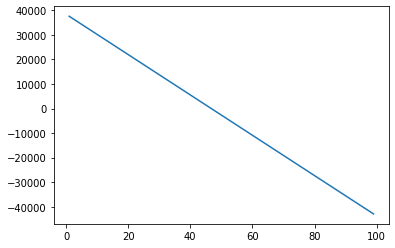

In [82]:
#We can plot all data points
plt.plot(new_input, yHat)

# Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

Simple Linear Model (SLR) vs Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

Multiple Linear Regression (MLR) vs Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

# Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.